In [4]:
from DDPG_framework import Agent
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import helper
import time

EPISODES = int(1e7)
USED_HISTORY_SEC = 20

SIM_RESOLUTION = .1
HIT_PENALTY = -100
SPEED_REWARD = 1
SPEED_DIFF_REWARD = 1


In [5]:
class vehicle:
    def __init__(self, speed, loc):
        self.location = loc[USED_HISTORY_SEC - 1]
        self.speed = speed[USED_HISTORY_SEC - 1]
        self.locT = np.array(loc[:USED_HISTORY_SEC])
        self.speedT = np.array(speed[:USED_HISTORY_SEC])
    def action_a(self, aRate):
        self.speed = self.speed + aRate * SIM_RESOLUTION
        self.location = self.location + self.speed * SIM_RESOLUTION
        self.locT = np.append(self.locT[1:], [self.location])
        self.speedT = np.append(self.speedT[1:], [self.speed])
    def action_v(self, speed):
        self.speed = speed
        self.location = self.location + speed * SIM_RESOLUTION
        self.locT = np.append(self.locT[1:], [self.location])
        self.speedT = np.append(self.speedT[1:], [self.speed])


In [16]:
leadSpeedProfile = np.genfromtxt('test_leader_2.csv', delimiter=',')
# leadSpeedProfile = leadSpeedProfile[:100]
# leadSpeedProfile = helper.make_speed_profile()

agent = Agent(alpha = .000025, beta = .00025, input_dims=[int(USED_HISTORY_SEC * 3)], tau=.001, 
              max_memory_size=100000, batch_size = 128, layer1_size = 400, layer2_size = 300, 
              n_actions = 1)

... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
0
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:0 episodeReward(avg):[14.525246]


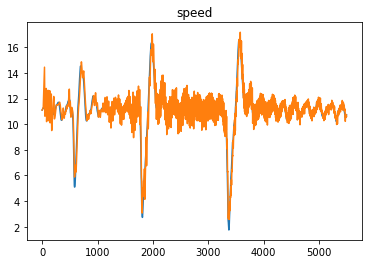

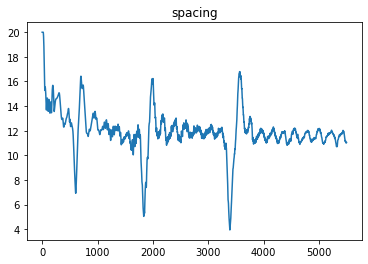

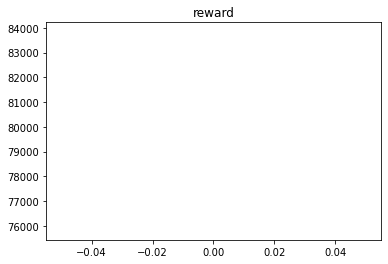

run time 130 s
1
run time 254 s
2
run time 377 s
3
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:3 episodeReward(avg):[14.932307]


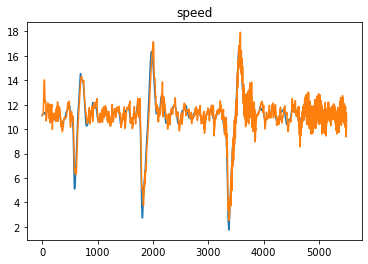

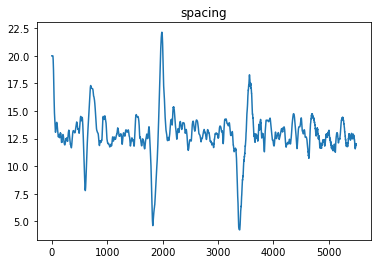

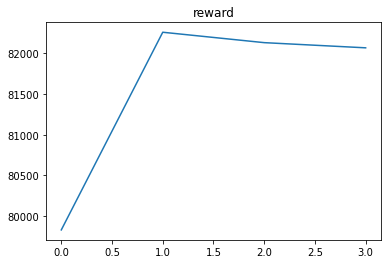

run time 503 s
4
run time 629 s
5
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:5 episodeReward(avg):[14.926894]


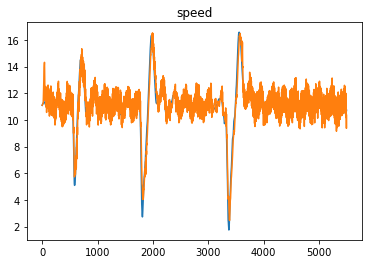

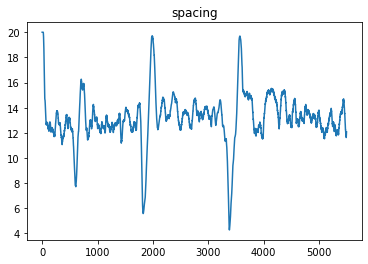

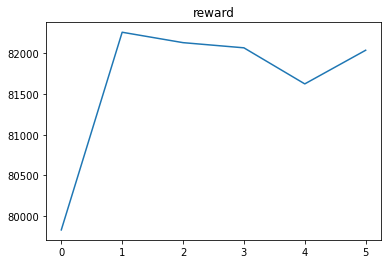

run time 764 s
6
run time 903 s
7
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:7 episodeReward(avg):[14.946727]


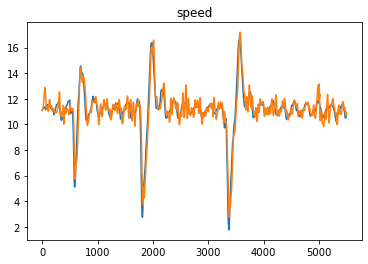

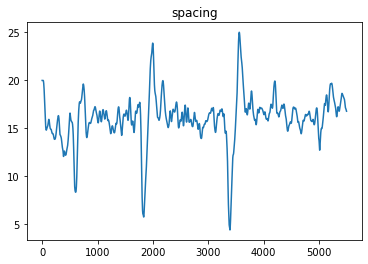

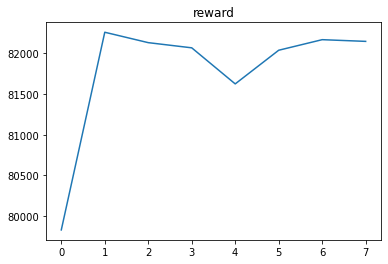

run time 1033 s
8
run time 1164 s
9
run time 1293 s
10
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:10 episodeReward(avg):[14.919371]


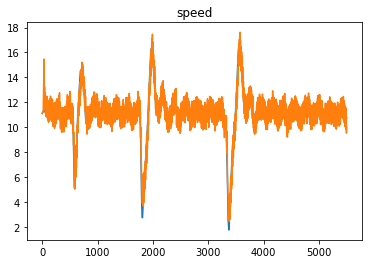

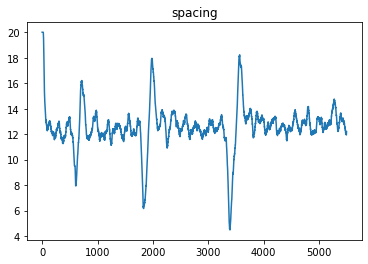

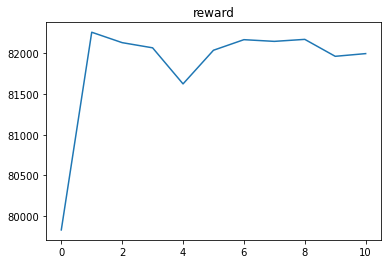

run time 1420 s
11
run time 1552 s
12
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:12 episodeReward(avg):[14.927781]


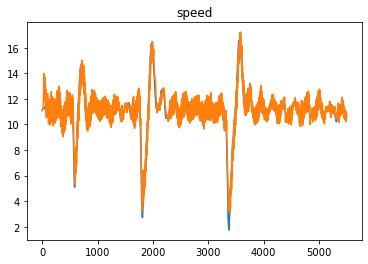

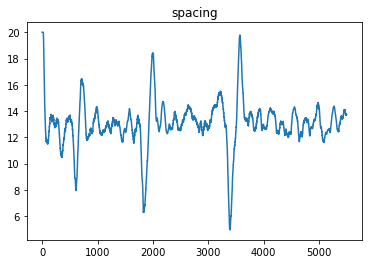

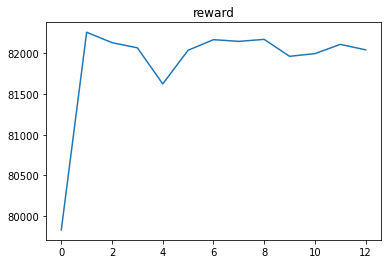

run time 1676 s
13
run time 1799 s
14
run time 1927 s
15
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:15 episodeReward(avg):[14.956165]


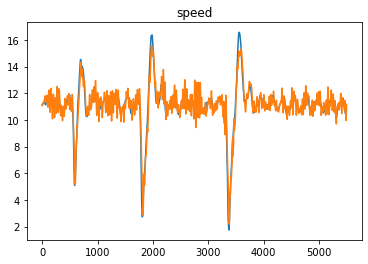

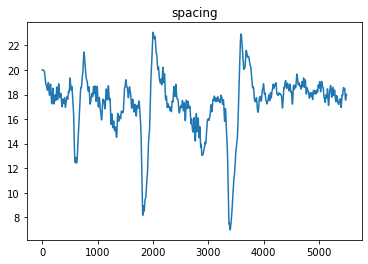

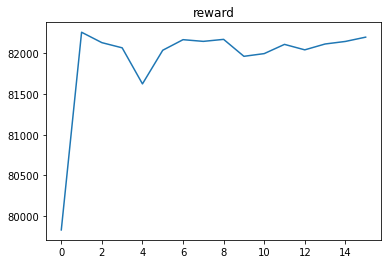

run time 2058 s
16
run time 2188 s
17
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:17 episodeReward(avg):[14.990916]


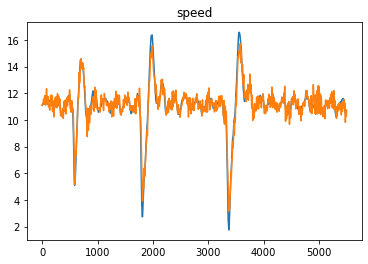

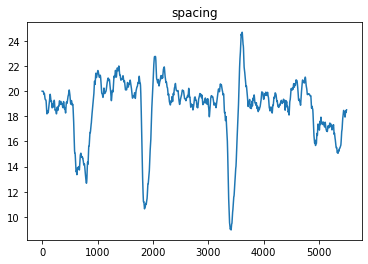

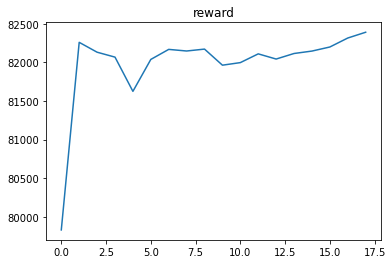

run time 2319 s
18
run time 2449 s
19
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:19 episodeReward(avg):[14.9221325]


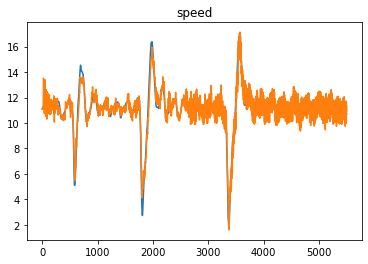

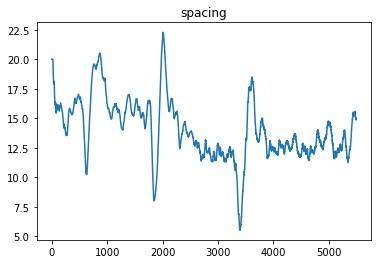

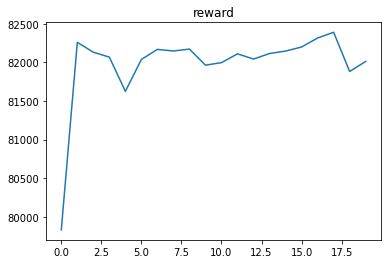

run time 2577 s
20
run time 2706 s
21
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:21 episodeReward(avg):[14.934411]


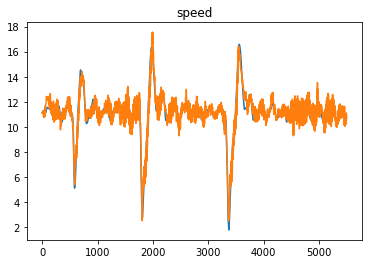

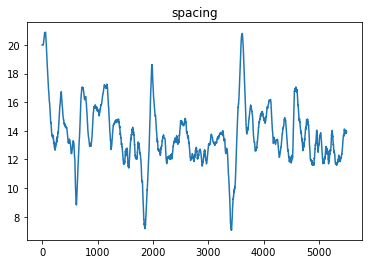

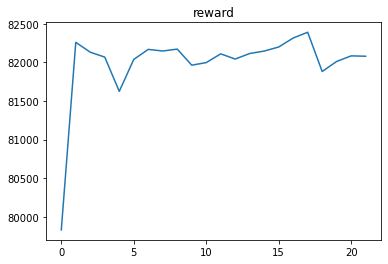

run time 2835 s
22
run time 2964 s
23
run time 3095 s
24
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:24 episodeReward(avg):[14.891921]


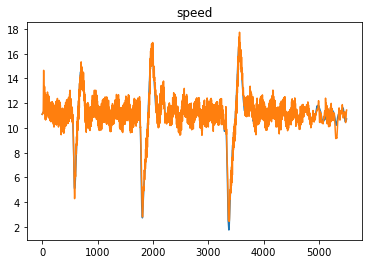

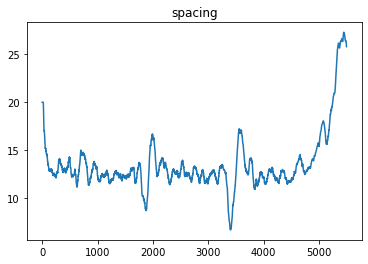

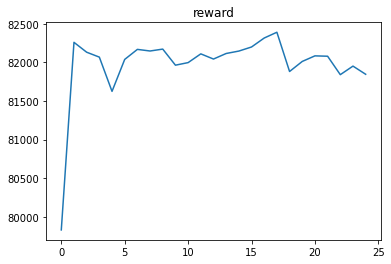

run time 3223 s
25
run time 3351 s
26
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:26 episodeReward(avg):[15.002404]


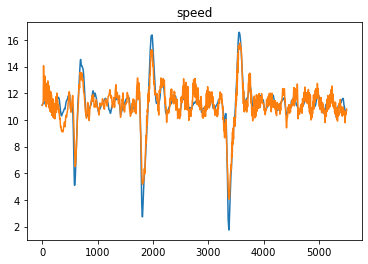

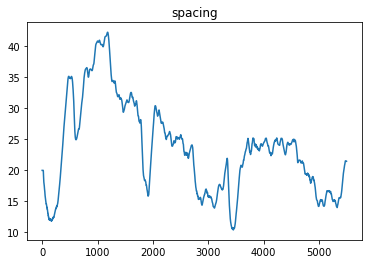

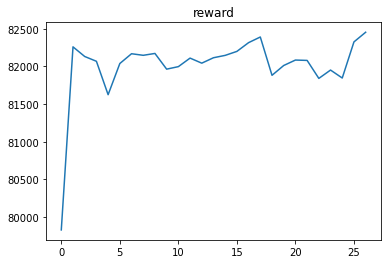

run time 3478 s
27
run time 3608 s
28
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:28 episodeReward(avg):[13.992744]


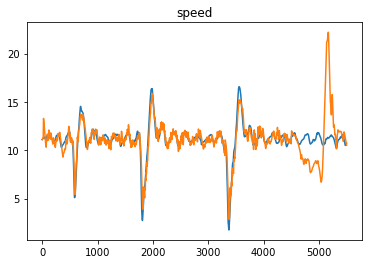

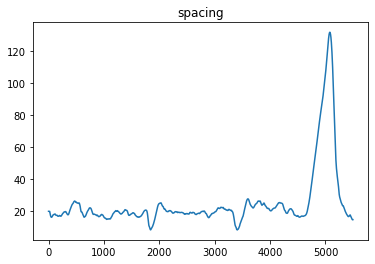

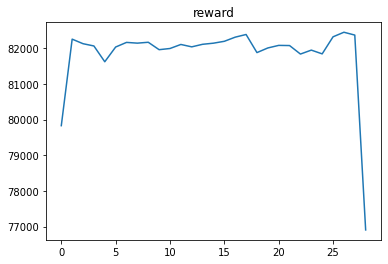

run time 3738 s
29
run time 3866 s
30
run time 3994 s
31
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:31 episodeReward(avg):[14.946112]


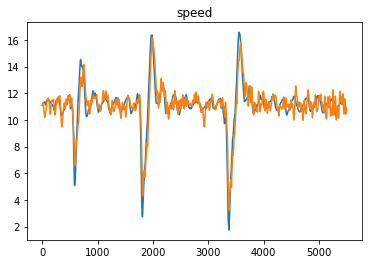

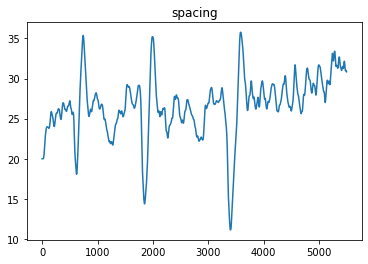

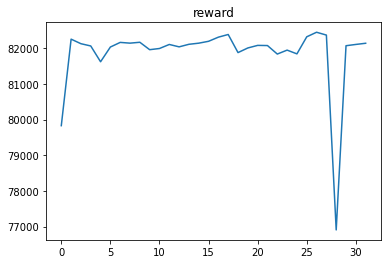

run time 4124 s
32
run time 4247 s
33
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:33 episodeReward(avg):[14.978912]


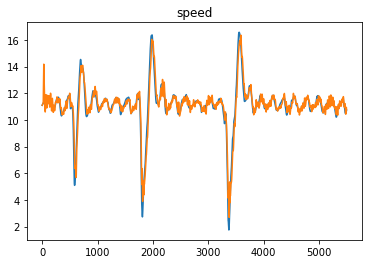

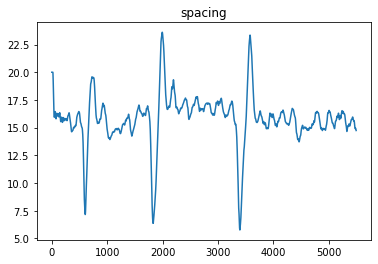

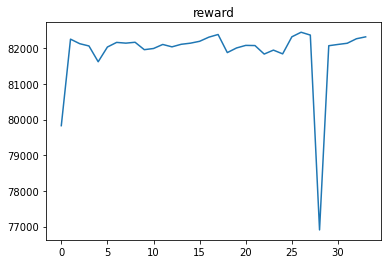

run time 4367 s
34
run time 4487 s
35
run time 4607 s
36
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:36 episodeReward(avg):[14.781479]


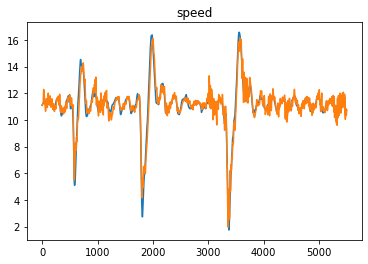

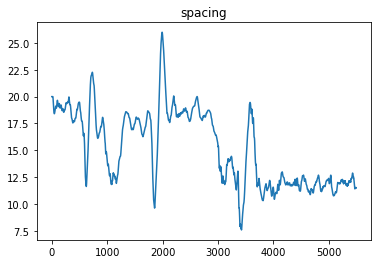

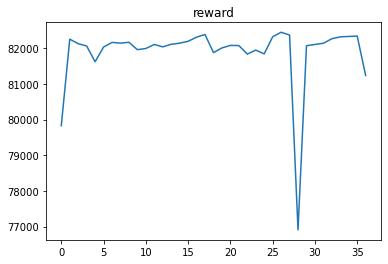

run time 4727 s
37
run time 4847 s
38
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:38 episodeReward(avg):[14.9470825]


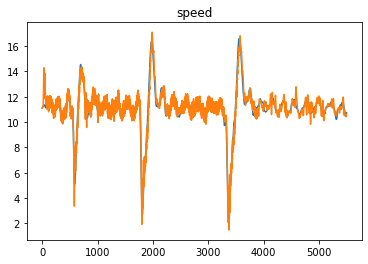

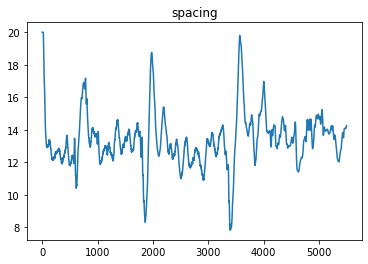

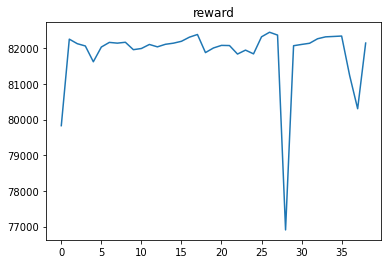

run time 4968 s
39
run time 5093 s
40
run time 5220 s
41
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:41 episodeReward(avg):[14.887266]


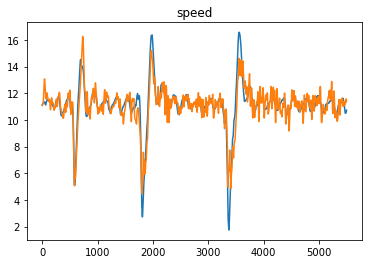

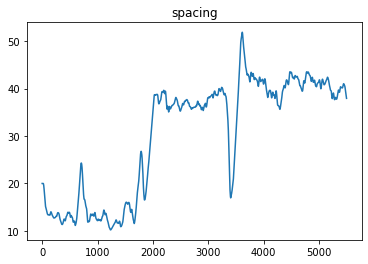

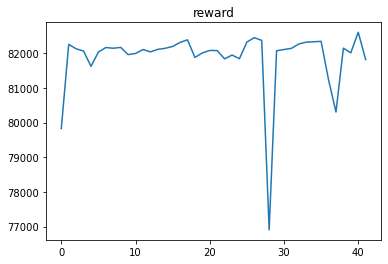

run time 5351 s
42
run time 5485 s
43
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:43 episodeReward(avg):[14.194597]


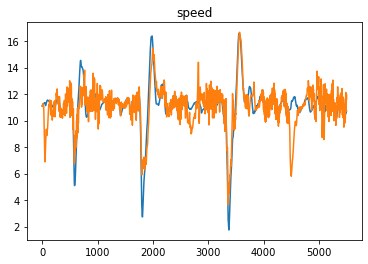

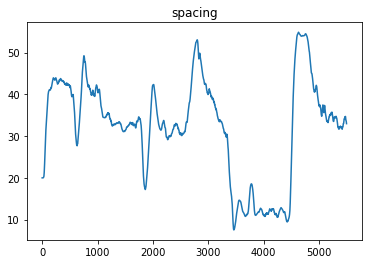

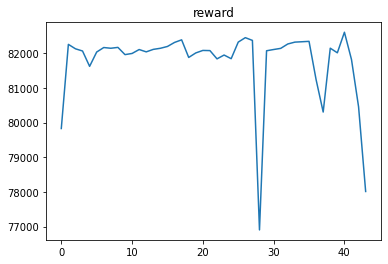

run time 5622 s
44
run time 5757 s
45
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:45 episodeReward(avg):[14.48956]


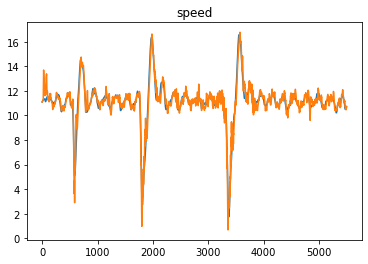

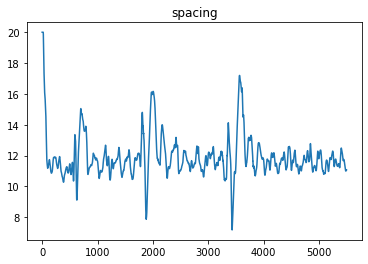

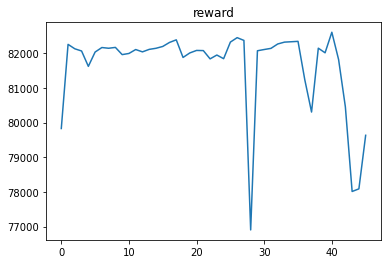

run time 5887 s
46
run time 6017 s
47
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:47 episodeReward(avg):[14.937877]


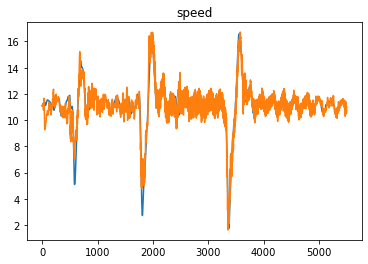

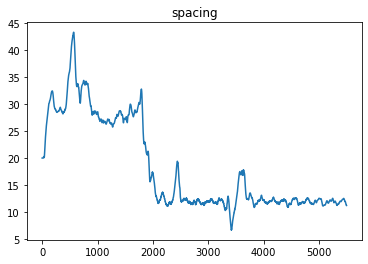

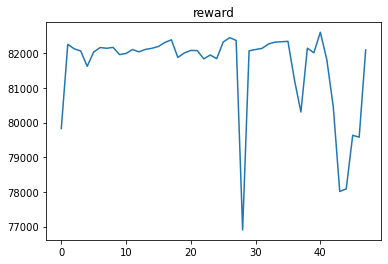

run time 6147 s
48
run time 6279 s
49
run time 6414 s
50
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:50 episodeReward(avg):[14.977096]


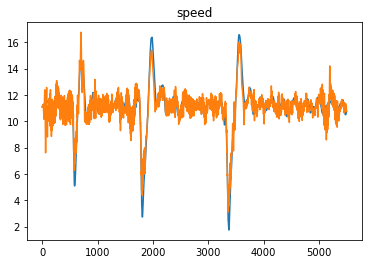

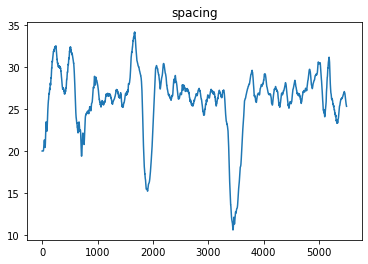

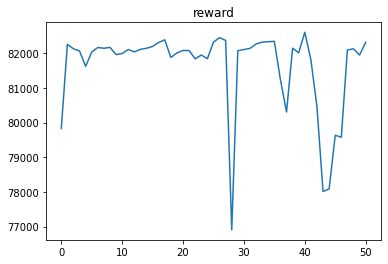

run time 6548 s
51
run time 6679 s
52
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
episode:52 episodeReward(avg):[14.927422]


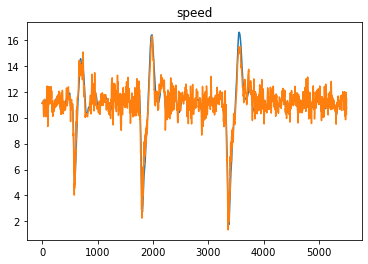

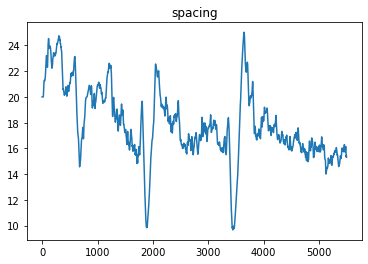

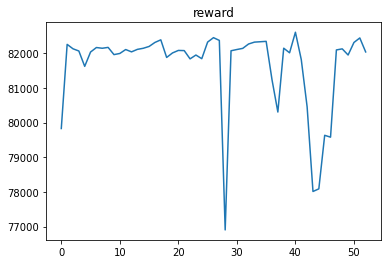

run time 6809 s
53


KeyboardInterrupt: 

In [17]:
epRewards = []
SAVE_CHECK_POINT = True
LOAD_CHECK_POINT = True

if LOAD_CHECK_POINT:
    agent.load_models()

runTime, begin = 0, 0
SHOW_EVERY = 300 #s

for episode in range(EPISODES):
    #initial 
    initialTime = time.monotonic()
    leaderLoc = [0]
    followerLoc = [-20]
    for v in leadSpeedProfile[1:USED_HISTORY_SEC]:
        leaderLoc.append(leaderLoc[-1] + v * SIM_RESOLUTION)
        followerLoc.append(followerLoc[-1] + v * SIM_RESOLUTION)
    follower = vehicle(leadSpeedProfile[:USED_HISTORY_SEC], followerLoc)
    leader = vehicle(leadSpeedProfile[:USED_HISTORY_SEC], leaderLoc)
    followerSpeedProfile = leadSpeedProfile[:USED_HISTORY_SEC]
    followerSpacing = np.array([20] * USED_HISTORY_SEC)
    episodeReward = 0
    
    print(episode)
    
    for t in range(USED_HISTORY_SEC, len(leadSpeedProfile)):
#         print(t)
        #current obs
        obs = np.concatenate((leader.speedT, follower.speedT,
                              [leader.locT[i] - follower.locT[i] for i in range(USED_HISTORY_SEC)]))

        #action, , new states, and reward
        #act
        act = agent.cal_action(obs)
        #new_states
        follower.action_a(act)
        leader.action_v(leadSpeedProfile[t])
        newSpacing = leader.location - follower.location
        newTimeGap = newSpacing / follower.speed
        newStates = np.concatenate((leader.speedT, follower.speedT,
                              [leader.locT[i] - follower.locT[i] for i in range(USED_HISTORY_SEC)]))
        if runTime >= begin:
            followerSpeedProfile = np.append(followerSpeedProfile, [follower.speed])
            followerSpacing = np.append(followerSpacing, newSpacing)
        #reward
        #headway 
        if newSpacing < 0:
            rewardHeadway = HIT_PENALTY
            done = 1
        else:
#             rewardHeadway = HIT_PENALTY * max(0, 10 - newSpacing) / 10
            rewardHeadway = HIT_PENALTY * max(0, 1 - newTimeGap) 
            done = 0
        #speed
        rewardSpeed = max(15, follower.speed) * SPEED_REWARD
#         rewardSpeed = 0
        #speed diff - if too close, should use lower speed than leader
#         rewardSpeedDiff = (10 - newSpacing) * (leader.speed - follower.speed)  * SPEED_DIFF_REWARD
        rewardSpeedDiff = (1 - newTimeGap) * (leader.speed - follower.speed)  * SPEED_DIFF_REWARD

        reward = rewardHeadway + rewardSpeed + rewardSpeedDiff
                
        #add memory to train set
        agent.remember(obs, act, reward, newStates, done)
        #learn from the train set
        agent.learn()
        # go to next time stamp
#         print(reward)
        episodeReward += reward
        obs = newStates
        
        if done:
            break
            

    epRewards.append(episodeReward)
    if runTime >= begin:
        begin += SHOW_EVERY
        if SAVE_CHECK_POINT:
            agent.save_models()
        print(f"episode:{episode} episodeReward(avg):{episodeReward/t}")
        plt.figure()
        plt.plot(leadSpeedProfile)
        plt.plot(followerSpeedProfile)
        plt.title('speed')
        plt.figure()
        plt.plot(followerSpacing)
        plt.title('spacing')
        plt.show()
        plt.figure()
        plt.plot(epRewards)
        plt.title('reward')
        plt.show()
        
    thisRunTime = round(time.monotonic() - initialTime)
    runTime += thisRunTime
    print('run time', thisRunTime, 's')        

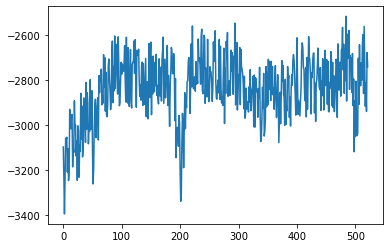

In [6]:
plt.plot(epRewards)